<a href="https://colab.research.google.com/github/IrinaIsobel/project2/blob/main/stroke_dataset_Project_2%2C_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwT4Q_Hiezgbu98UOI6Qb9BbkmnK8ghZ7-xowBNpr2_h2CHcE9JJNC4vzyAs4rxdRlIdmYCFBoldlj/pub?output=csv')
stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df = stroke.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Target:
>Stroke
- Features:
>Age, Gender, Hypertension, Heart Disease, Work Type, Residence Type, Average Glucose Level, BMI, and Smoking Status

#Cleaning Data

- Changing column names to lowercase for convenience

In [5]:
df= df.rename(columns=str.lower)

- Removing Duplicates

In [6]:
df.duplicated().sum()

0

- Dropping Unecessary Columns

In [7]:
df.drop(columns = ['id', 'ever_married'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [8]:
df.shape

(5110, 10)

- Identifying and Addressing Missing Values

In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
201/5110

0.03933463796477495

> Of 5,110 rows, 201 have null values. This amounts to 3.9%, which is negligible, therefore I will drop the rows from the data set.



In [11]:
df.dropna(inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Identifying and Correcting Inconsistencies

In [12]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
dtypes = df.dtypes
cat_col = dtypes[dtypes == 'object'].index
cat_col

Index(['gender', 'work_type', 'residence_type', 'smoking_status'], dtype='object')

In [14]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n\n')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64



Urban    2490
Rural    2419
Name: residence_type, dtype: int64



never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64





In [15]:
df.replace({'children':'Children', 'Govt_job':'Govt_Job','Never_worked':'Never_Worked','never smoked':'Never_Smoked', 'formerly smoked':'Formerly_Smoked', 'smokes':'Smokes'}, inplace = True)

In [16]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n\n')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



Private          2811
Self-employed     775
Children          671
Govt_Job          630
Never_Worked       22
Name: work_type, dtype: int64



Urban    2490
Rural    2419
Name: residence_type, dtype: int64



Never_Smoked       1852
Unknown            1483
Formerly_Smoked     837
Smokes              737
Name: smoking_status, dtype: int64





In [17]:
# Since "Other" only occurs once in the gender category, and "Never Worked" only occurs 22 times, I will drop these categories to improve dimensionality.

df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.drop(df[df['work_type'] == 'Never_Worked'].index, inplace = True)

print(df['work_type'].value_counts())
print("\n")
print(df['gender'].value_counts())

Private          2810
Self-employed     775
Children          671
Govt_Job          630
Name: work_type, dtype: int64


Female    2886
Male      2000
Name: gender, dtype: int64


> All categorcial data is consistent.

In [18]:
num_col = dtypes[dtypes != 'object'].index
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [19]:
for col in num_col:
    print(f'Column = {col}')
    print(df[col].sort_values(ascending=False))
    print('\n\n')

Column = age
2314    82.00
4511    82.00
2453    82.00
1412    82.00
1350    82.00
        ...  
3968     0.16
4021     0.16
3618     0.16
1614     0.08
3295     0.08
Name: age, Length: 4886, dtype: float64



Column = hypertension
2710    1
3243    1
4505    1
3248    1
744     1
       ..
1835    0
1834    0
1833    0
1832    0
5109    0
Name: hypertension, Length: 4886, dtype: int64



Column = heart_disease
0       1
1752    1
1954    1
1953    1
1920    1
       ..
1878    0
1877    0
1876    0
159     0
5109    0
Name: heart_disease, Length: 4886, dtype: int64



Column = avg_glucose_level
193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
         ...  
772      55.26
682      55.25
4110     55.23
1191     55.22
4886     55.12
Name: avg_glucose_level, Length: 4886, dtype: float64



Column = bmi
2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
922     12.3
657     12.0
2187    11.5
3307    11.3
1609    10.3
Name: bmi, Length: 

In [20]:
df['age'].sort_values(ascending = True)

1614     0.08
3295     0.08
3968     0.16
4021     0.16
3618     0.16
        ...  
23      82.00
337     82.00
1769    82.00
3316    82.00
4094    82.00
Name: age, Length: 4886, dtype: float64

In [21]:
df.loc[df['age'] < 1]

gender   age  hypertension  heart_disease work_type residence_type  \
363   Female  0.64             0              0  Children          Urban   
376   Female  0.88             0              0  Children          Rural   
564   Female  0.32             0              0  Children          Rural   
982     Male  0.88             0              0  Children          Rural   
996     Male  0.24             0              0  Children          Rural   
1093  Female  0.32             0              0  Children          Rural   
1206  Female  0.72             0              0  Children          Urban   
1317    Male  0.80             0              0  Children          Rural   
1600    Male  0.40             0              0  Children          Urban   
1614  Female  0.08             0              0  Children          Urban   
1808  Female  0.64             0              0  Children          Urban   
1975    Male  0.56             0              0  Children          Rural   
1999    Male  0.24             0              0  Children          Rural   
2008    Male  0.56             0              0  Children          Rural   
2012    Male  0.64             0              0  Children          Rural   
2358    Male  0.88             0              0  Children          Urban   
2481    Male  0.88             0              0  Children          Urban   
2490    Male  0.88             0              0  Children          Urban   
2579    Male  0.32             0              0  Children          Urban   
2630  Female  0.80             0              0  Children          Urban   
2801    Male  0.80             0              0  Children          Urban   
2875    Male  0.64             0              0  Children          Urban   
2898    Male  0.24             0              0  Children          Urban   
3251    Male  0.56             0              0  Children          Rural   
3295    Male  0.08             0              0  Children          Rural   
3392    Male  0.24             0              0  Children          Urban   
3440    Male  0.56             0              0  Children          Urban   
3618    Male  0.16             0              0  Children          Urban   
3626    Male  0.80             0              0  Children          Rural   
3859    Male  0.32             0              0  Children          Urban   
3894  Female  0.56             0              0  Children          Urban   
3968    Male  0.16             0              0  Children          Rural   
4007    Male  0.72             0              0  Children          Rural   
4021    Male  0.16             0              0  Children          Urban   
4053  Female  0.48             0              0  Children          Rural   
4293    Male  0.24             0              0  Children          Urban   
4409  Female  0.72             0              0  Children          Rural   
4581  Female  0.40             0              0  Children          Rural   
4645  Female  0.48             0              0  Children          Rural   
4910  Female  0.32             0              0  Children          Urban   
4929    Male  0.72             0              0  Children          Urban   
5089  Female  0.72             0              0  Children          Rural   

      avg_glucose_level   bmi smoking_status  stroke  
363               83.82  24.9        Unknown       0  
376               88.11  15.5        Unknown       0  
564               73.71  16.2        Unknown       0  
982              157.57  19.2        Unknown       0  
996              118.87  16.3        Unknown       0  
1093              55.86  16.0        Unknown       0  
1206              66.36  23.0        Unknown       0  
1317              98.67  17.5        Unknown       0  
1600             109.56  14.3        Unknown       0  
1614             139.67  14.1        Unknown       0  
1808              62.27  17.3        Unknown       0  
1975             111.77  21.1        Unknown       0  
1999             146.9

In [22]:
df.loc[df['age'] < 1].value_counts().sum()

42

In [23]:
df.shape

(4886, 10)

In [24]:
42/4886

0.008595988538681949

>There are 42 rows out of 4886 with ages under 1. Though these values account for less than 1% of data, I will not drop all data. I will instead round the values to the nearest integer and drop any infants whose ages are 0.

>I do not believe that keeping or dropping the data of infants will significantly affect stroke predictions, but I will opt to keep as much data as possible while dropping seemingly unnecessary data.

In [25]:
df['age'] = df['age'].round()

In [26]:
df.loc[df['age'] == 0].value_counts().sum()

19

In [27]:
19/4886

0.003888661481784691

>There are now 19 rows of data with ages of 0. This amount of data accounts for roughly 0.04 percent of the whole, and therefore is a negligible amount to drop in addition to the dropped rows with null data.

In [28]:
df = df[df.age != 0]
df.loc[df['age'] == 0].value_counts().sum()

0

>I will now turn the 'age' data type from float to integer to keep simple, consistent, and possible values for age.

In [29]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4867 non-null   object 
 1   age                4867 non-null   int64  
 2   hypertension       4867 non-null   int64  
 3   heart_disease      4867 non-null   int64  
 4   work_type          4867 non-null   object 
 5   residence_type     4867 non-null   object 
 6   avg_glucose_level  4867 non-null   float64
 7   bmi                4867 non-null   float64
 8   smoking_status     4867 non-null   object 
 9   stroke             4867 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 418.3+ KB


<ipython-input-29-2afe91dddd95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [30]:
4867/5110

0.9524461839530333

- After cleaning data, we have retained 95.2% of our original data. Values are consistent and possible.

#Visual Exploration

In [31]:
# Instantiating data frame of stroke victims to further explore their data
y_stroke = df.loc[df['stroke'] == 1]

In [134]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

##Age

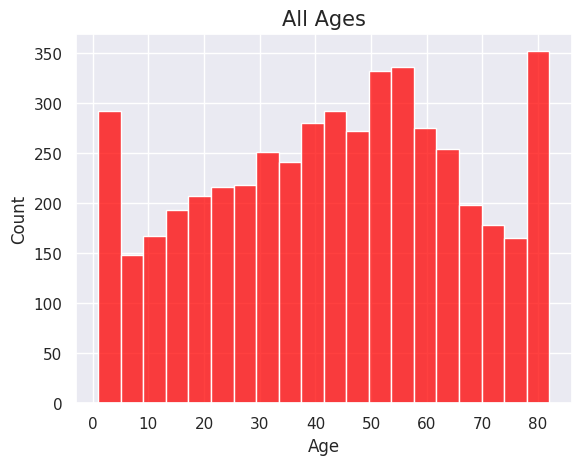

In [33]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'age', color = 'red')
plt.title('All Ages', fontsize = 15)
plt.xlabel('Age');

In [34]:
df['age'].describe()

count    4867.000000
mean       43.156976
std        22.417672
min         1.000000
25%        25.000000
50%        45.000000
75%        60.500000
max        82.000000
Name: age, dtype: float64

- The ages of persons whose data were collected ranged from 1 to 82.
- The average age was 43.

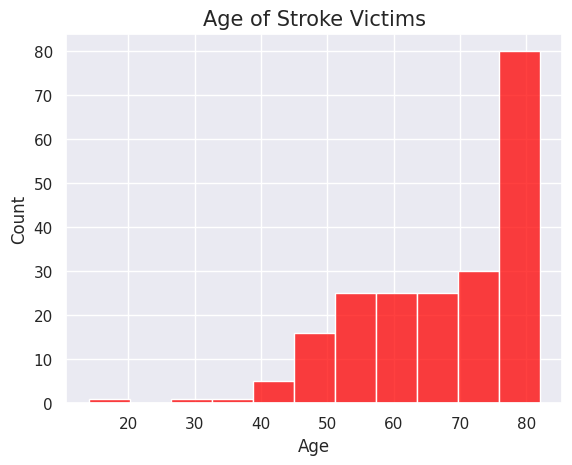

In [35]:
sns.set(style = 'darkgrid')
sns.histplot(data = y_stroke, x = 'age', color = 'red')
plt.title('Age of Stroke Victims', fontsize = 15)
plt.xlabel('Age');

In [36]:
y_stroke['age'].describe()

count    209.000000
mean      67.712919
std       12.402848
min       14.000000
25%       58.000000
50%       70.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

- The youngest stroke victim was 14 years old
- The average age of stroke victims is about 68 years old
- Most stroke victims are over the age of 58

## Gender

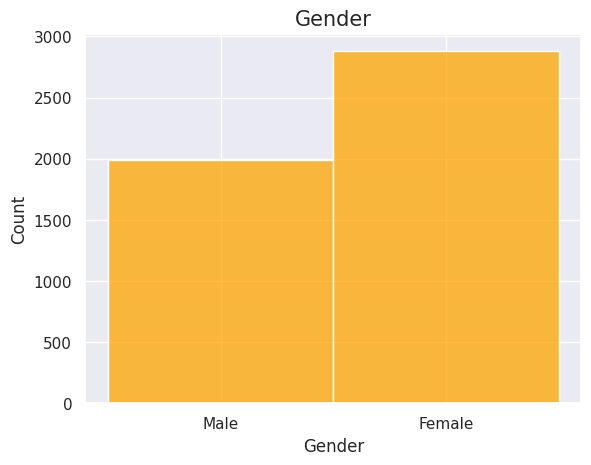



Female    2879
Male      1988
Name: gender, dtype: int64


In [37]:
sns.histplot(data = df, x = 'gender', color = 'orange')
plt.title('Gender', fontsize = 15)
plt.xlabel('Gender');
plt.show()
print('\n')
print(df['gender'].value_counts())

- More data from females was collected than male.

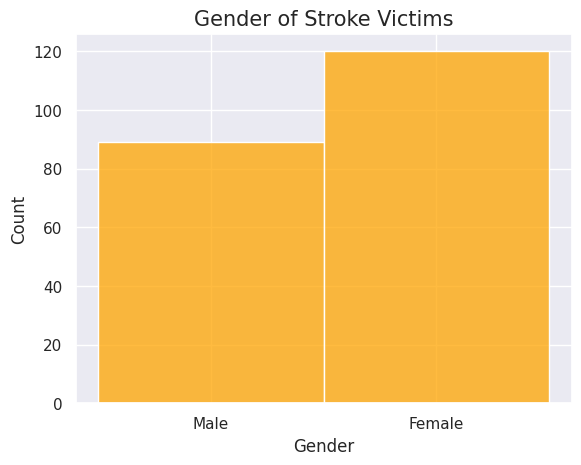



Female    120
Male       89
Name: gender, dtype: int64


In [38]:
sns.histplot(data = y_stroke, x = 'gender', color = 'orange')
plt.title('Gender of Stroke Victims', fontsize = 15)
plt.xlabel('Gender');
plt.show()
print('\n')
print(y_stroke['gender'].value_counts())

- More females had instances of a stroke

##Hypertension

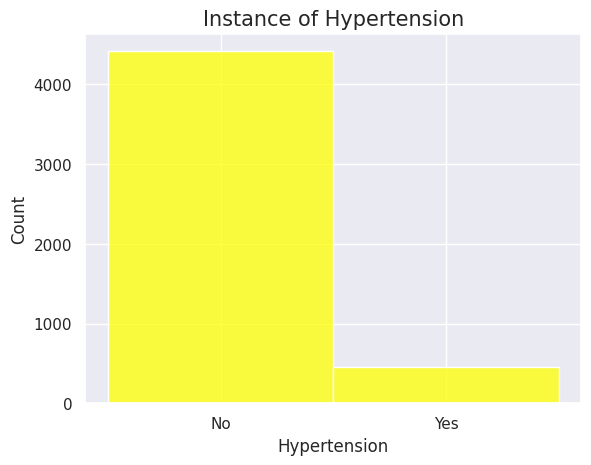



0    4416
1     451
Name: hypertension, dtype: int64


In [39]:
hist_df = df.copy()
hist_df['hypertension'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'hypertension', color = 'yellow')
plt.title('Instance of Hypertension', fontsize = 15)
plt.xlabel('Hypertension');
plt.show()
print('\n')
print(df['hypertension'].value_counts())

- The majority of persons did not have hypertension.

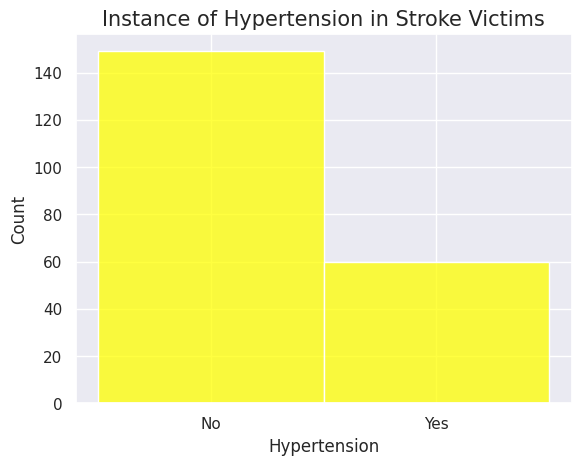



0    149
1     60
Name: hypertension, dtype: int64


In [40]:
yhist_df = y_stroke.copy()
yhist_df['hypertension'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = yhist_df, x = 'hypertension', color = 'yellow')
plt.title('Instance of Hypertension in Stroke Victims', fontsize = 15)
plt.xlabel('Hypertension');
plt.show()
print('\n')
print(y_stroke['hypertension'].value_counts())

- Most stroke victims did not have hypertension

##Heart Disease

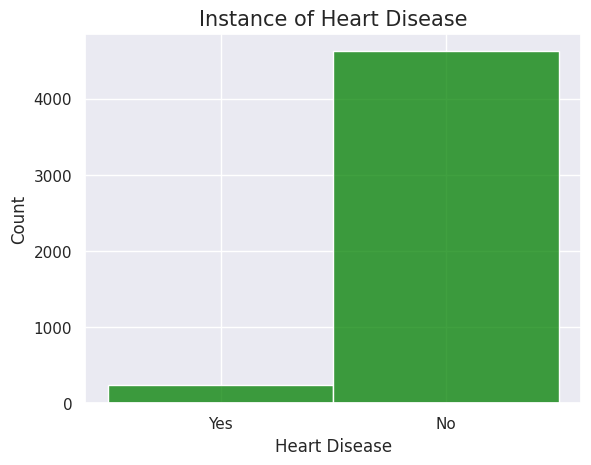



0    4624
1     243
Name: heart_disease, dtype: int64


In [41]:
hist_df['heart_disease'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'heart_disease', color = 'green')
plt.title('Instance of Heart Disease', fontsize = 15)
plt.xlabel('Heart Disease');
plt.show()
print('\n')
print(df['heart_disease'].value_counts())

- The majority of persons did not have heart disease.

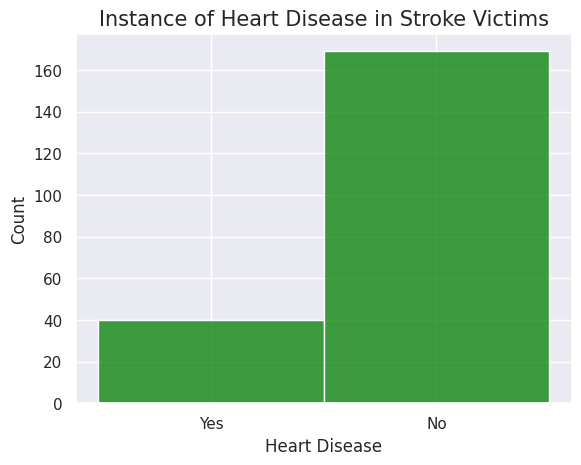



0    169
1     40
Name: heart_disease, dtype: int64


In [42]:
yhist_df['heart_disease'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = yhist_df, x = 'heart_disease', color = 'green')
plt.title('Instance of Heart Disease in Stroke Victims', fontsize = 15)
plt.xlabel('Heart Disease');
plt.show()
print('\n')
print(y_stroke['heart_disease'].value_counts())

- Most stroke victims did not have heart disease

In [43]:
y_ht = y_stroke.loc[y_stroke['hypertension'] == 1]
y_ht.loc[y_ht['heart_disease'] == 1]

gender  age  hypertension  heart_disease      work_type residence_type  \
6      Male   74             1              1        Private          Rural   
35   Female   82             1              1        Private          Rural   
115    Male   71             1              1       Govt_Job          Rural   
143  Female   69             1              1  Self-employed          Urban   
184    Male   61             1              1        Private          Urban   
187  Female   82             1              1       Govt_Job          Urban   
193    Male   68             1              1        Private          Rural   
201    Male   80             1              1        Private          Urban   
217  Female   55             1              1        Private          Urban   
220    Male   81             1              1        Private          Urban   
243  Female   68             1              1        Private          Urban   

     avg_glucose_level   bmi   smoking_status  stroke  
6                70.09  27.4     Never_Smoked       1  
35               84.03  26.5  Formerly_Smoked       1  
115             216.94  30.9     Never_Smoked       1  
143              72.17  36.8     Never_Smoked       1  
184             112.24  37.4           Smokes       1  
187             215.94  27.9  Formerly_Smoked       1  
193             271.74  31.1           Smokes       1  
201             175.29  31.5  Formerly_Smoked       1  
217             210.40  40.0           Smokes       1  
220             250.89  28.1           Smokes       1  
243             247.51  40.5  Formerly_Smoked       1

In [44]:
11/209

0.05263157894736842

- 11 stroke victims, approx. 5%, had both hypertension and heart disease

##Work Type

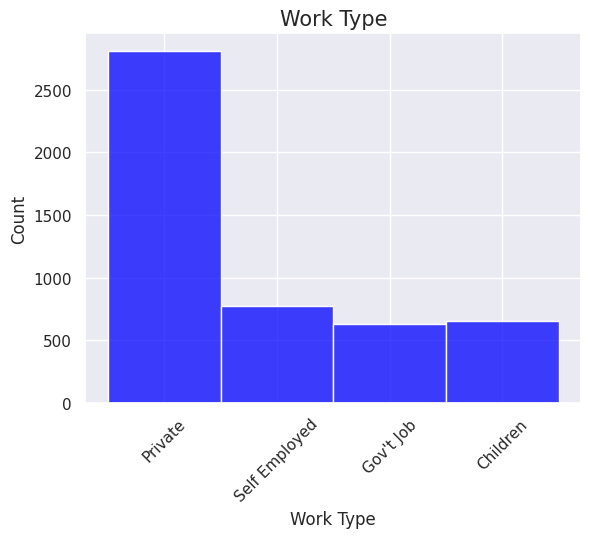



Private          2810
Self-employed     775
Children          652
Govt_Job          630
Name: work_type, dtype: int64


In [45]:
ax3 = sns.histplot(data = df, x = 'work_type', color = 'blue')
ax3.set_xticks([0, 1, 2, 3])
ax3.set_xticklabels(['Private', 'Self Employed', "Gov't Job", 'Children'], rotation = 45)
plt.title('Work Type', fontsize = 15)
plt.xlabel('Work Type');
plt.show()
print('\n')
print(df['work_type'].value_counts())

- The majority of persons are employed by a private employer.
- 652 persons were identified as children.

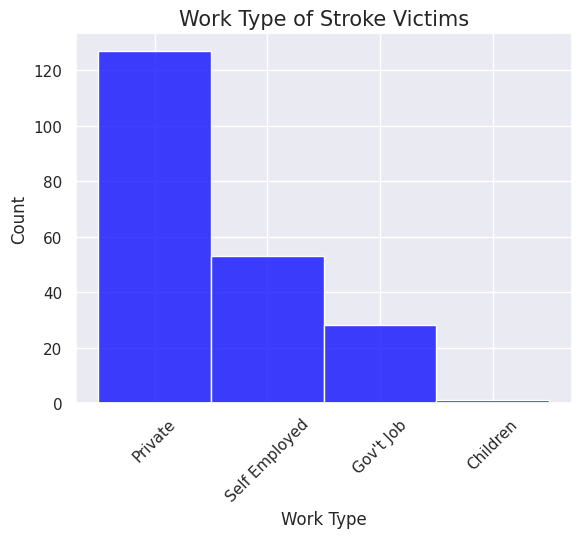



Private          127
Self-employed     53
Govt_Job          28
Children           1
Name: work_type, dtype: int64


In [46]:
ax31 = sns.histplot(data = y_stroke, x = 'work_type', color = 'blue')
ax31.set_xticks([0, 1, 2, 3])
ax31.set_xticklabels(['Private', 'Self Employed', "Gov't Job", 'Children'], rotation = 45)
plt.title('Work Type of Stroke Victims', fontsize = 15)
plt.xlabel('Work Type');
plt.show()
print('\n')
print(y_stroke['work_type'].value_counts())

##Residence Type

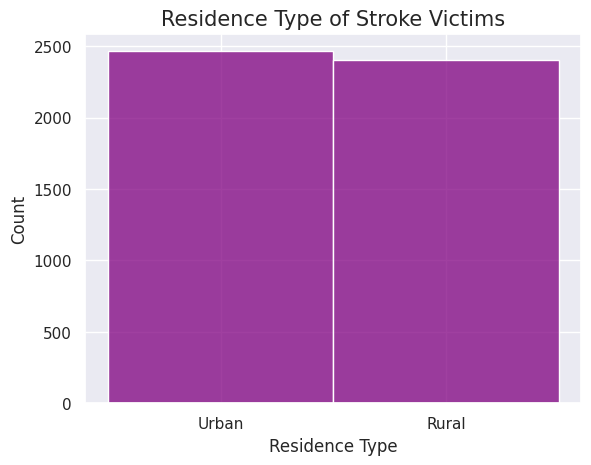



Urban    2465
Rural    2402
Name: residence_type, dtype: int64


In [47]:
sns.histplot(data = df, x = 'residence_type', color = 'purple')
plt.title('Residence Type of Stroke Victims', fontsize = 15)
plt.xlabel('Residence Type');
plt.show()
print('\n')
print(df['residence_type'].value_counts())

- The data collected comes from an almost equal spit between rural and urban residences.

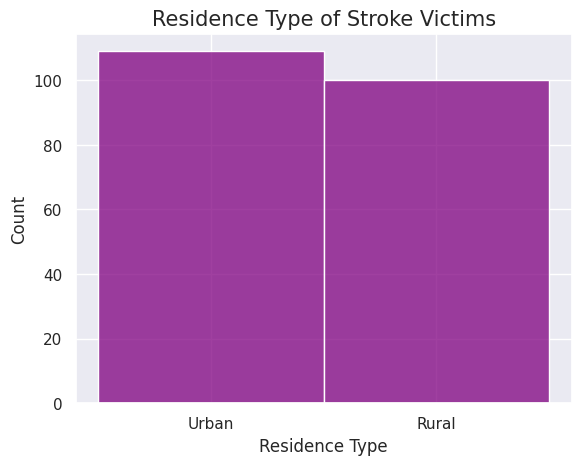



Urban    109
Rural    100
Name: residence_type, dtype: int64


In [48]:
sns.histplot(data = y_stroke, x = 'residence_type', color = 'purple')
plt.title('Residence Type of Stroke Victims', fontsize = 15)
plt.xlabel('Residence Type');
plt.show()
print('\n')
print(y_stroke['residence_type'].value_counts())

- Residence types are still about equal

##Average Glucose Level

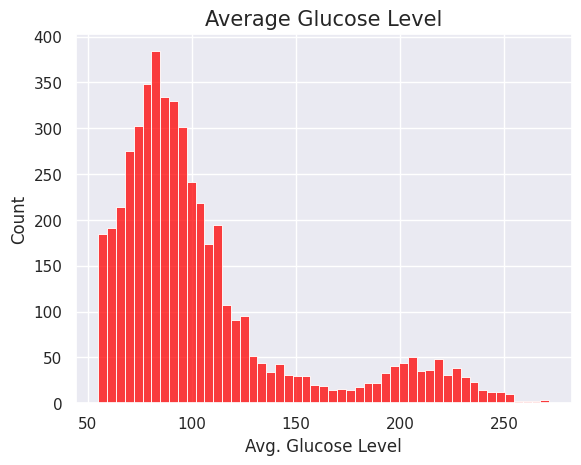

In [49]:
sns.histplot(data = df, x = 'avg_glucose_level', color = 'red')
plt.title('Average Glucose Level', fontsize = 15)
plt.xlabel('Avg. Glucose Level');

- The majority of persons had average glucose levels under 120.

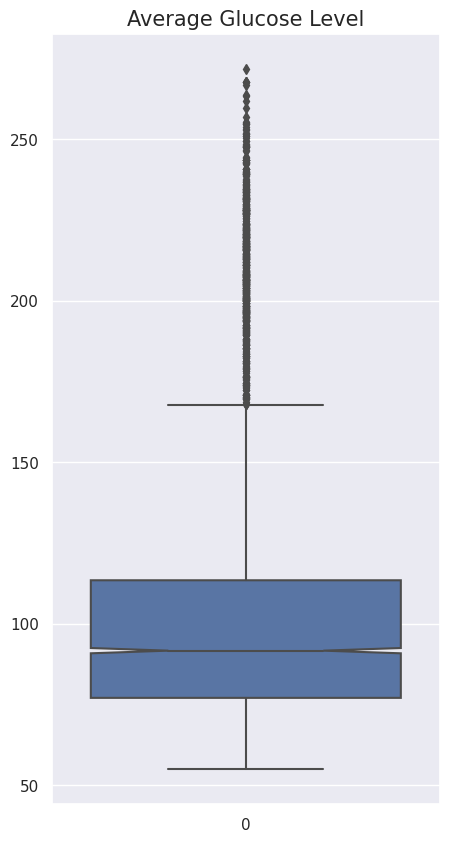



count    4867.000000
mean      105.372733
std        44.532515
min        55.120000
25%        77.075000
50%        91.680000
75%       113.460000
max       271.740000
Name: avg_glucose_level, dtype: float64


In [50]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = df['avg_glucose_level'], notch = True)
plt.title('Average Glucose Level', fontsize = 15);
plt.show()
print('\n')
print(df['avg_glucose_level'].describe())

In [51]:
113.46 + 1.5*(113.46 - 77.075)

168.03749999999997

In [52]:
# Amount of Average Glucose Level outliers was calculated by finding the maximum and identifying any data points beyond.
# Maximum was calculated by equation Q3 + 1.5*IQR, or 75th percentile plus the product of 1.5 and the difference of the 75th to the 25th percentile.
gluc_outlier = df[df['avg_glucose_level'] > 168.0375]
gluc_outlier.sort_values(by = 'avg_glucose_level', ascending= True)

gender  age  hypertension  heart_disease      work_type residence_type  \
2517    Male   55             1              0        Private          Urban   
1575  Female   18             0              0        Private          Rural   
1797  Female   26             0              0        Private          Urban   
4266    Male   81             0              0        Private          Urban   
2637    Male   78             0              1  Self-employed          Urban   
...      ...  ...           ...            ...            ...            ...   
2462  Female   60             0              0       Govt_Job          Rural   
4983    Male   76             1              0        Private          Rural   
3088  Female   76             0              0  Self-employed          Urban   
1207  Female   49             0              0        Private          Urban   
193     Male   68             1              1        Private          Rural   

      avg_glucose_level   bmi   smoking_status  stroke  
2517             168.06  23.5           Smokes       0  
1575             168.15  48.5     Never_Smoked       0  
1797             168.15  22.9     Never_Smoked       0  
4266             168.68  23.4  Formerly_Smoked       0  
2637             169.43  23.5  Formerly_Smoked       0  
...                 ...   ...              ...     ...  
2462             266.59  25.5     Never_Smoked       0  
4983             267.60  30.5     Never_Smoked       0  
3088             267.61  27.9           Smokes       0  
1207             267.76  29.3  Formerly_Smoked       0  
193              271.74  31.1           Smokes       1  

[570 rows x 10 columns]

In [53]:
print(f'Outliers: {gluc_outlier.value_counts().sum()}')
print(f'{((gluc_outlier.value_counts().sum())/4867).round(4)*100}%')

Outliers: 570
11.709999999999999%


- There were 570 outliers in Average Glucose Levels, which accouts for approximately 11.71% of collected data.
- The outlier values ranged from 168.06 to 271.74

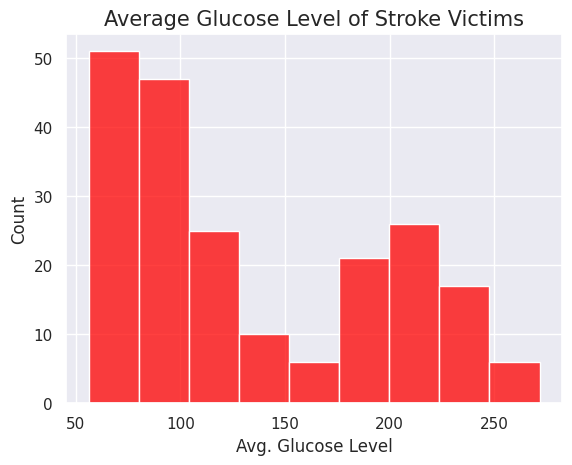

In [54]:
sns.histplot(data = y_stroke, x = 'avg_glucose_level', color = 'red')
plt.title('Average Glucose Level of Stroke Victims', fontsize = 15)
plt.xlabel('Avg. Glucose Level');

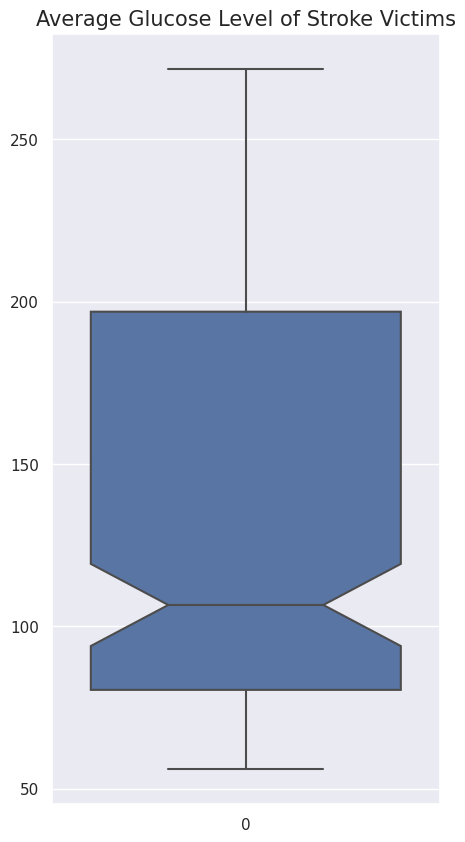



count    4867.000000
mean      105.372733
std        44.532515
min        55.120000
25%        77.075000
50%        91.680000
75%       113.460000
max       271.740000
Name: avg_glucose_level, dtype: float64


In [55]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = y_stroke['avg_glucose_level'], notch = True)
plt.title('Average Glucose Level of Stroke Victims', fontsize = 15);
plt.show()
print('\n')
print(df['avg_glucose_level'].describe())

In [56]:
ygluc_outlier = y_stroke[y_stroke['avg_glucose_level'] > 168.0375]
ygluc_outlier.shape

(73, 10)

In [57]:
73/570

0.1280701754385965

In [58]:
73/209

0.3492822966507177

- 73 of 570, or approximately 13%, of avg. glucose level outliers were stroke victims
- 73 of 209, or approximately 35% of stroke victims had outlying avg. glucose levels

##BMI

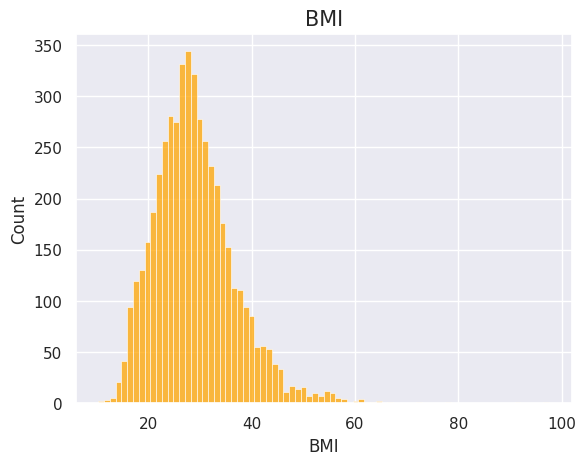

In [59]:
sns.histplot(data = df, x = 'bmi', color = 'orange')
plt.title('BMI', fontsize = 15)
plt.xlabel('BMI');

- Majority of BMI levels were 35 and under.

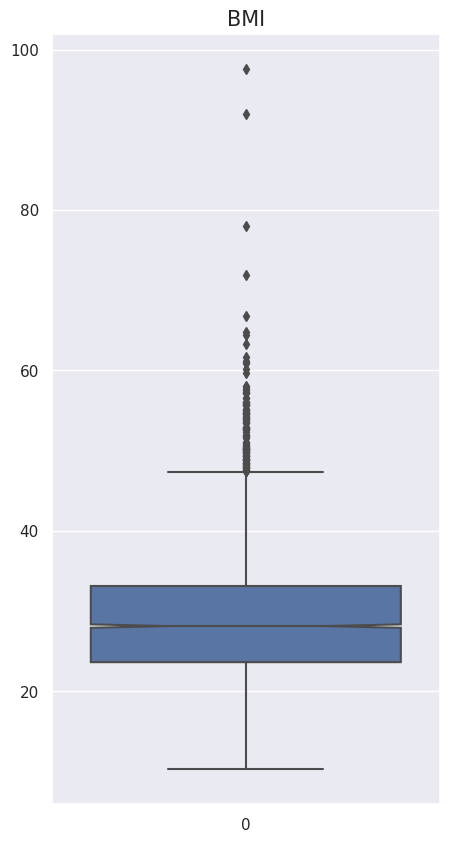



count    4867.000000
mean       28.957448
std         7.830354
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [60]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = df['bmi'], notch = True)
plt.title('BMI', fontsize = 15);
plt.show()
print('\n')
print(df['bmi'].describe())

In [61]:
33.1 + 1.5*(33.1 - 23.6)

47.35

In [62]:
# Amount of BMI outliers was calculated by finding the maximum and identifying any data points beyond.
# Maximum was calculated by equation Q3 + 1.5*IQR, or 75th percentile plus the product of 1.5 and the difference of the 75th to the 25th percentile.
bmi_outlier = df[df['bmi'] > 47.35]
bmi_outlier.sort_values(by = 'bmi', ascending= True)

gender  age  hypertension  heart_disease work_type residence_type  \
3594  Female   62             0              0   Private          Rural   
66    Female   70             0              0   Private          Urban   
1529  Female   82             0              0   Private          Urban   
4533  Female   32             0              0   Private          Rural   
4405  Female   70             0              0   Private          Rural   
...      ...  ...           ...            ...       ...            ...   
1559  Female   53             0              0   Private          Rural   
544     Male   42             0              0   Private          Rural   
928   Female   23             1              0   Private          Urban   
4209    Male   38             1              0   Private          Rural   
2128    Male   17             1              0   Private          Rural   

      avg_glucose_level   bmi smoking_status  stroke  
3594             226.38  47.4   Never_Smoked       0  
66               221.58  47.5   Never_Smoked       1  
1529             253.16  47.5        Unknown       0  
4533              66.30  47.5   Never_Smoked       0  
4405             149.80  47.6        Unknown       0  
...                 ...   ...            ...     ...  
1559              72.63  66.8        Unknown       0  
544              210.48  71.9   Never_Smoked       0  
928               70.03  78.0         Smokes       0  
4209              56.90  92.0   Never_Smoked       0  
2128              61.67  97.6        Unknown       0  

[114 rows x 10 columns]

In [63]:
print(f'Outliers: {bmi_outlier.value_counts().sum()}')
print(f'{((bmi_outlier.value_counts().sum())/4867).round(4)*100}%')

Outliers: 114
2.34%


- There were 114 outliers in BMI, which accouts for approximately 2.34% of collected data.
- The outlier values ranged from 47.4 to 97.6

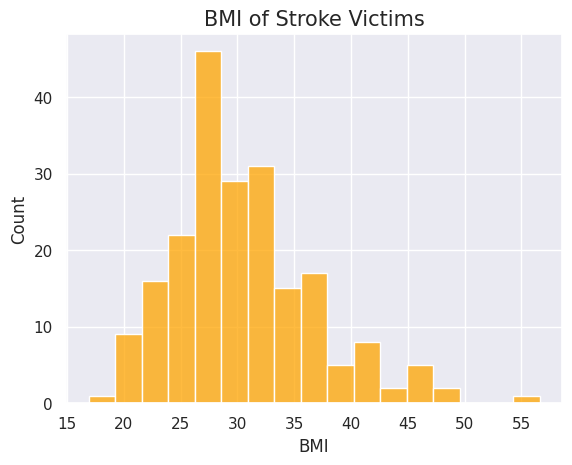

In [64]:
sns.histplot(data = y_stroke, x = 'bmi', color = 'orange')
plt.title('BMI of Stroke Victims', fontsize = 15)
plt.xlabel('BMI');

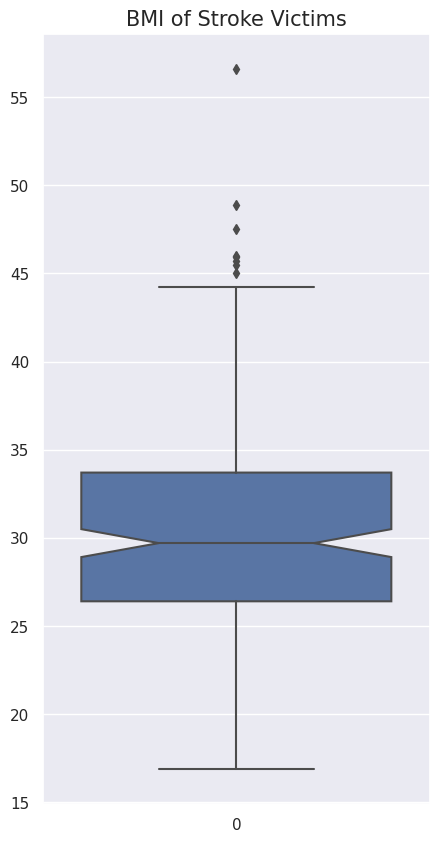



count    4867.000000
mean       28.957448
std         7.830354
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [65]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = y_stroke['bmi'], notch = True)
plt.title('BMI of Stroke Victims', fontsize = 15);
plt.show()
print('\n')
print(df['bmi'].describe())

In [66]:
bmi_outlier = y_stroke[y_stroke['bmi'] > 47.35]
bmi_outlier.sort_values(by = 'bmi', ascending= True)

gender  age  hypertension  heart_disease      work_type residence_type  \
66   Female   70             0              0        Private          Urban   
21   Female   52             1              0  Self-employed          Urban   
113  Female   45             0              0        Private          Rural   

     avg_glucose_level   bmi smoking_status  stroke  
66              221.58  47.5   Never_Smoked       1  
21              233.29  48.9   Never_Smoked       1  
113             224.10  56.6   Never_Smoked       1

In [67]:
3/114

0.02631578947368421

In [68]:
3/209

0.014354066985645933

- Only 3 of 114, or approximately 3% of BMI outliers had an instance of stroke
- Only 3 of 209, or approx. 1% of stroke victims had an outlying BMI

##Smoking Status

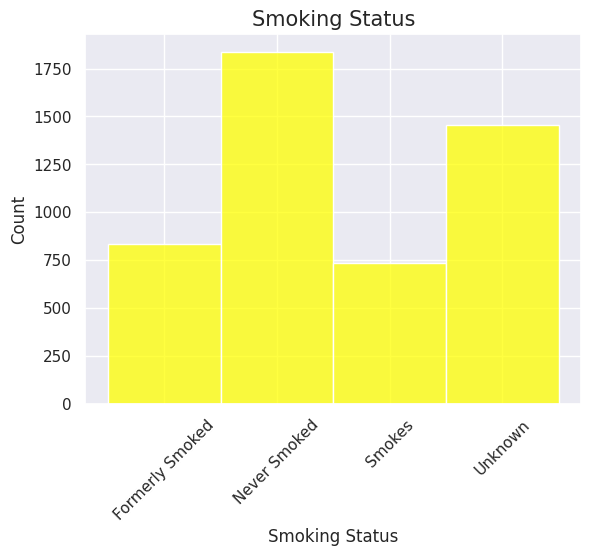



Never_Smoked       1838
Unknown            1456
Formerly_Smoked     836
Smokes              737
Name: smoking_status, dtype: int64


In [69]:
ax4 = sns.histplot(data = df, x = 'smoking_status', color = 'yellow')
ax4.set_xticks([0, 1, 2, 3])
ax4.set_xticklabels(['Formerly Smoked', 'Never Smoked', 'Smokes', 'Unknown'], rotation = 45)
plt.title('Smoking Status', fontsize = 15)
plt.xlabel('Smoking Status');
plt.show()
print('\n')
print(df['smoking_status'].value_counts())

In [70]:
(1464/4890)

0.29938650306748466

- Majority of known smoking status falls under Never Smoked
- There is a large amount of Unknown values (~ 29.9%).
>Since cigarette smoking is a well established risk factor for all forms of stroke ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2928253/#:~:text=Cigarette%20smoking%20is%20a%20well,for%20all%20forms%20of%20stroke)) I have not dropped this column. Imputing incorrect values on such a large amount of data will skew results, therefore I will work with data as-is.

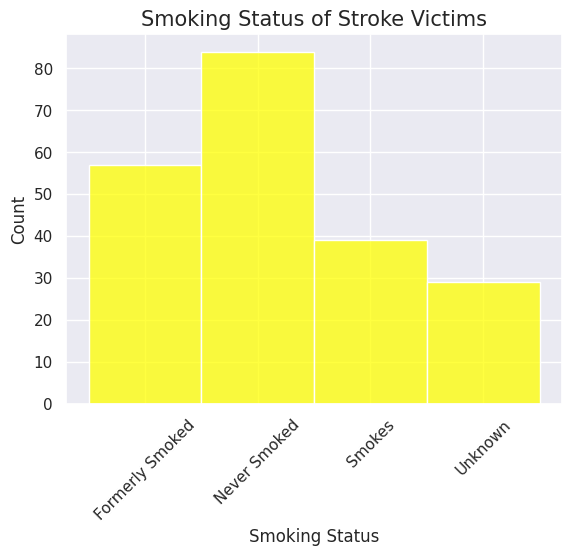



Never_Smoked       84
Formerly_Smoked    57
Smokes             39
Unknown            29
Name: smoking_status, dtype: int64


In [71]:
ax4 = sns.histplot(data = y_stroke, x = 'smoking_status', color = 'yellow')
ax4.set_xticks([0, 1, 2, 3])
ax4.set_xticklabels(['Formerly Smoked', 'Never Smoked', 'Smokes', 'Unknown'], rotation = 45)
plt.title('Smoking Status of Stroke Victims', fontsize = 15)
plt.xlabel('Smoking Status');
plt.show()
print('\n')
print(y_stroke['smoking_status'].value_counts())

- Stroke victims who smoke or have formerly smoked amount to 96, whereas stroke victims who have never smoked amount to 84.
- Without acknowledging the group with unknown status, these numbers are similar.

##Stroke

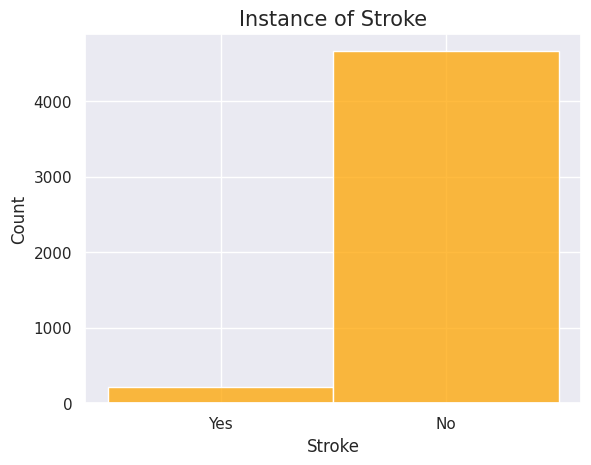



0    4658
1     209
Name: stroke, dtype: int64


In [72]:
hist_df['stroke'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'stroke', color = 'orange')
plt.title('Instance of Stroke', fontsize = 15)
plt.xlabel('Stroke');
plt.show()
print('\n')
print(df['stroke'].value_counts())

- The majority of persons have not suffered a stroke.
- This data is severely imbalanced, as our target and features are disproportionate.
- This may create problems during machine learning and predictions.

##Multivariate Visuals

<ipython-input-73-1a45058a2be8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


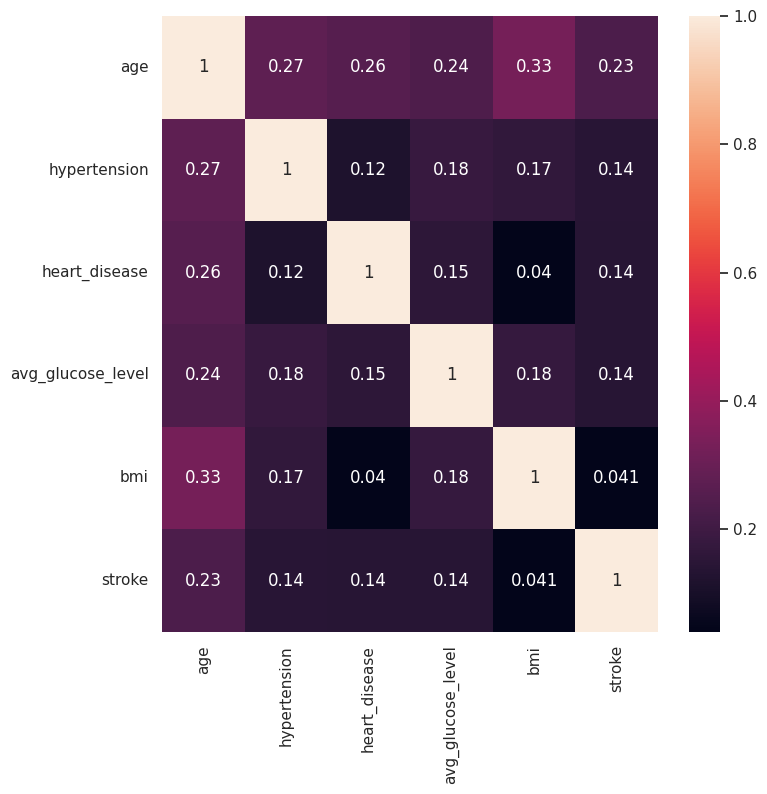

In [73]:
corr = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True);

- There is a low correlation between BMI and age
- All other correlations are negligible

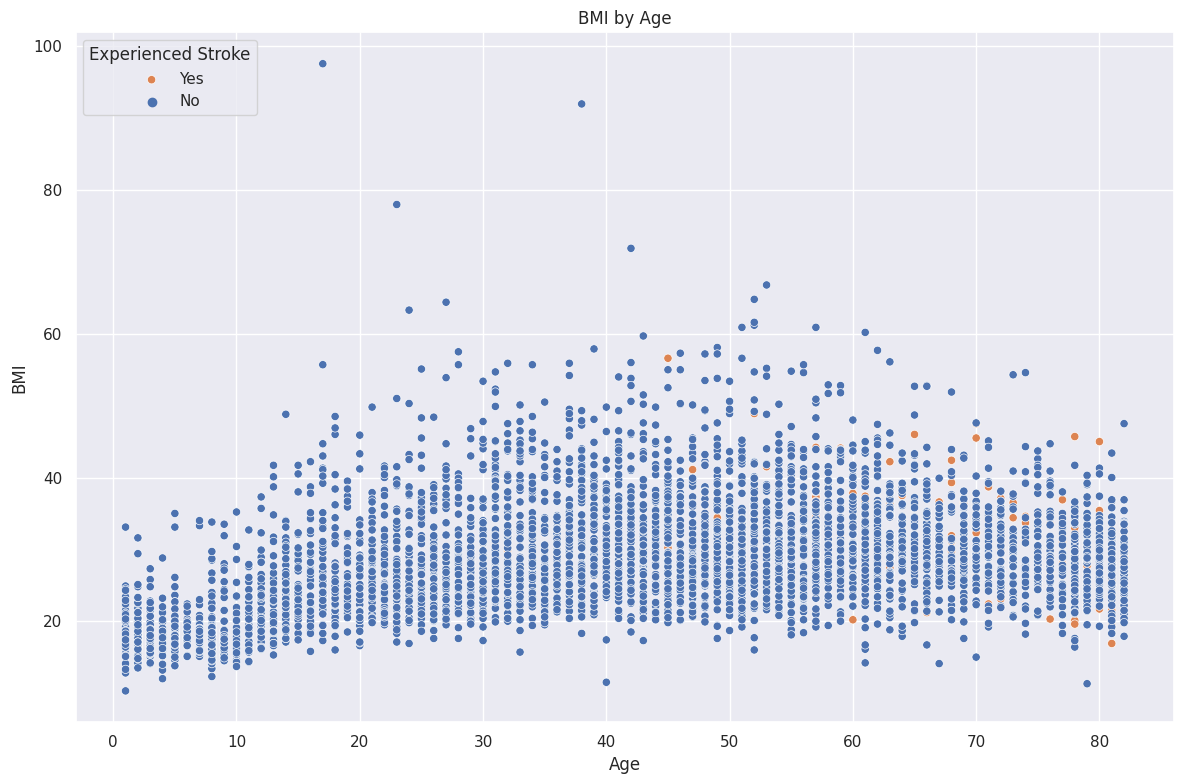

In [74]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'stroke')
plt.legend(title='Experienced Stroke', loc='upper left', labels=['Yes', 'No'])
plt.title('BMI by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.tight_layout();

- Here we see BMI by age.
- According to the Centers for Disease Control and Prevention (CDC), a healthy BMI ranges from 18.5 to 24.9 ([source](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20overweight%20range))
- BMI seems to rise slightly starting at age 30, then begins to fall slightly around age 65.

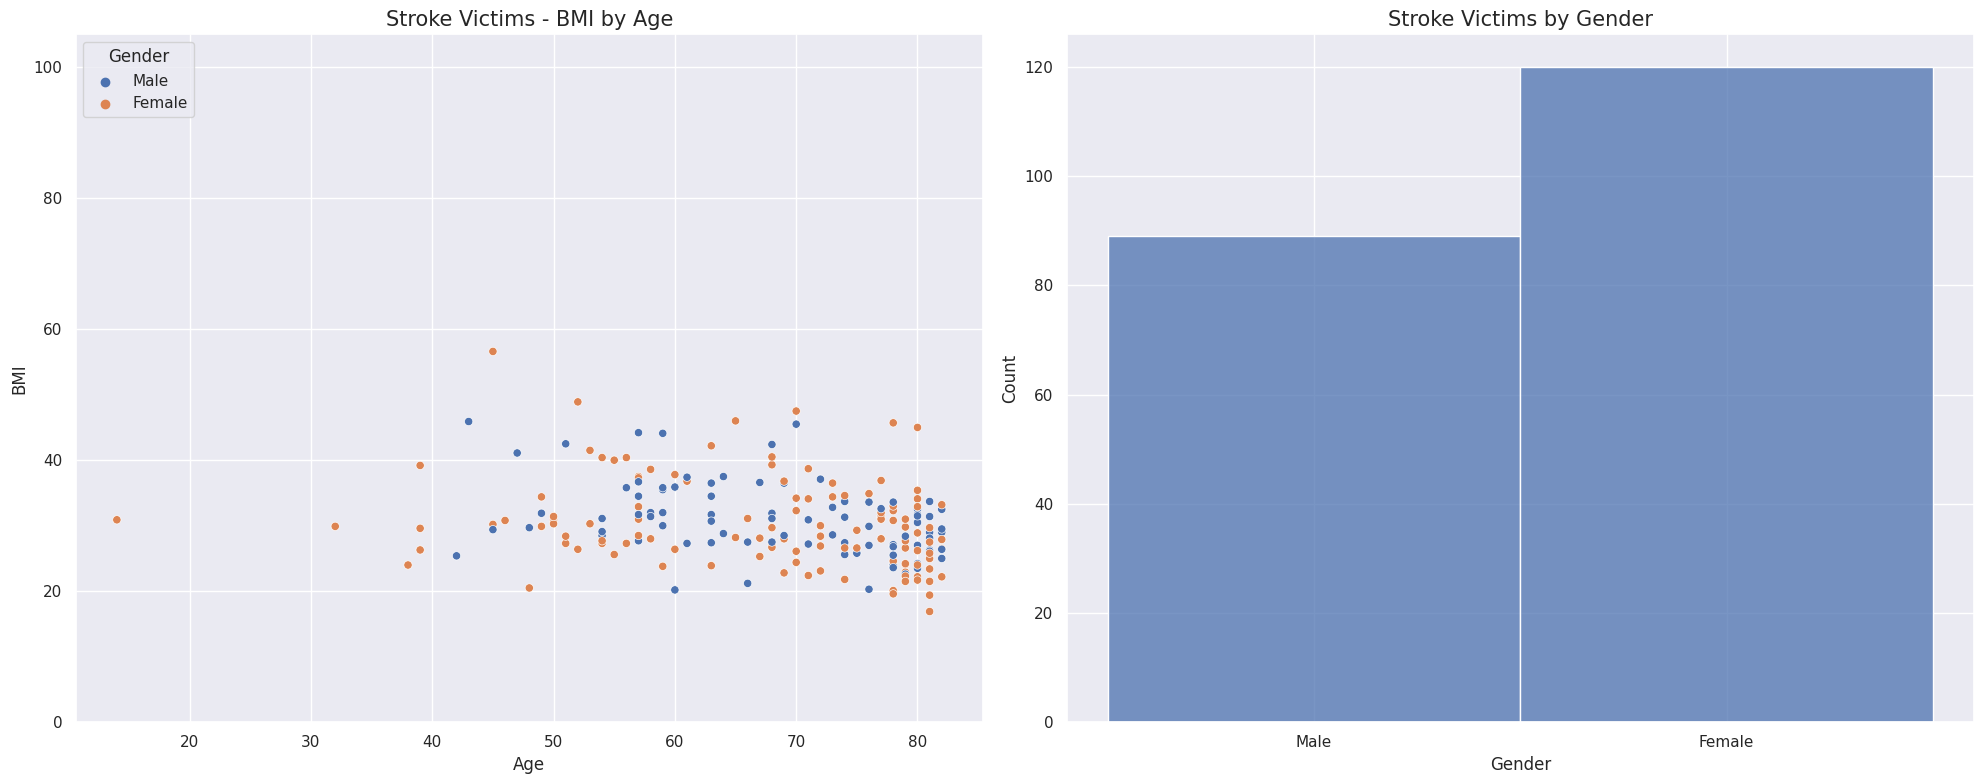

In [75]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
a = sns.histplot(data = y_stroke,
                 x = 'gender',
                 ax=axs[1]
                 )
a.set_title('Stroke Victims by Gender', fontsize = 15)
a.set_xlabel('Gender')



b = sns.scatterplot(data = y_stroke,
                    x = 'age', y = 'bmi',
                    hue= 'gender', ax=axs[0]
                    )
b.legend(title='Gender', loc='upper left')
b.set(ylim = (0, 105))
b.set_title('Stroke Victims - BMI by Age', fontsize = 15)
b.set_xlabel('Age')
b.set_ylabel('BMI')
plt.tight_layout();

In [76]:
over_avg_bmi = y_stroke[y_stroke['bmi'] > 24.9]
over_avg_bmi.sort_values(by = 'bmi', ascending= True)

gender  age  hypertension  heart_disease      work_type residence_type  \
159  Female   81             1              0  Self-employed          Rural   
140    Male   82             0              1       Govt_Job          Rural   
62   Female   67             1              0  Self-employed          Rural   
31     Male   42             0              0        Private          Rural   
177    Male   78             1              0  Self-employed          Rural   
..      ...  ...           ...            ...            ...            ...   
79     Male   43             0              0  Self-employed          Urban   
190  Female   65             0              0        Private          Urban   
66   Female   70             0              0        Private          Urban   
21   Female   52             1              0  Self-employed          Urban   
113  Female   45             0              0        Private          Rural   

     avg_glucose_level   bmi   smoking_status  stroke  
159              74.02  25.0     Never_Smoked       1  
140             103.68  25.0     Never_Smoked       1  
62               61.94  25.3           Smokes       1  
31               83.41  25.4          Unknown       1  
177              56.11  25.5  Formerly_Smoked       1  
..                 ...   ...              ...     ...  
79              143.43  45.9          Unknown       1  
190             205.77  46.0  Formerly_Smoked       1  
66              221.58  47.5     Never_Smoked       1  
21              233.29  48.9     Never_Smoked       1  
113             224.10  56.6     Never_Smoked       1  

[173 rows x 10 columns]

In [77]:
173/209

0.8277511961722488

- When we isolate the stroke victims and group by gender, we can see that stroke occurences are more frequent as age increases.
- Most stroke victims have a BMI of 25 or higher - approximately 82.8%
- We see stroke occurences start earlier in females. This could be due to the higher amount of data we have received from females.
- The highest density of stroke occurences are from ages 75 - 85.

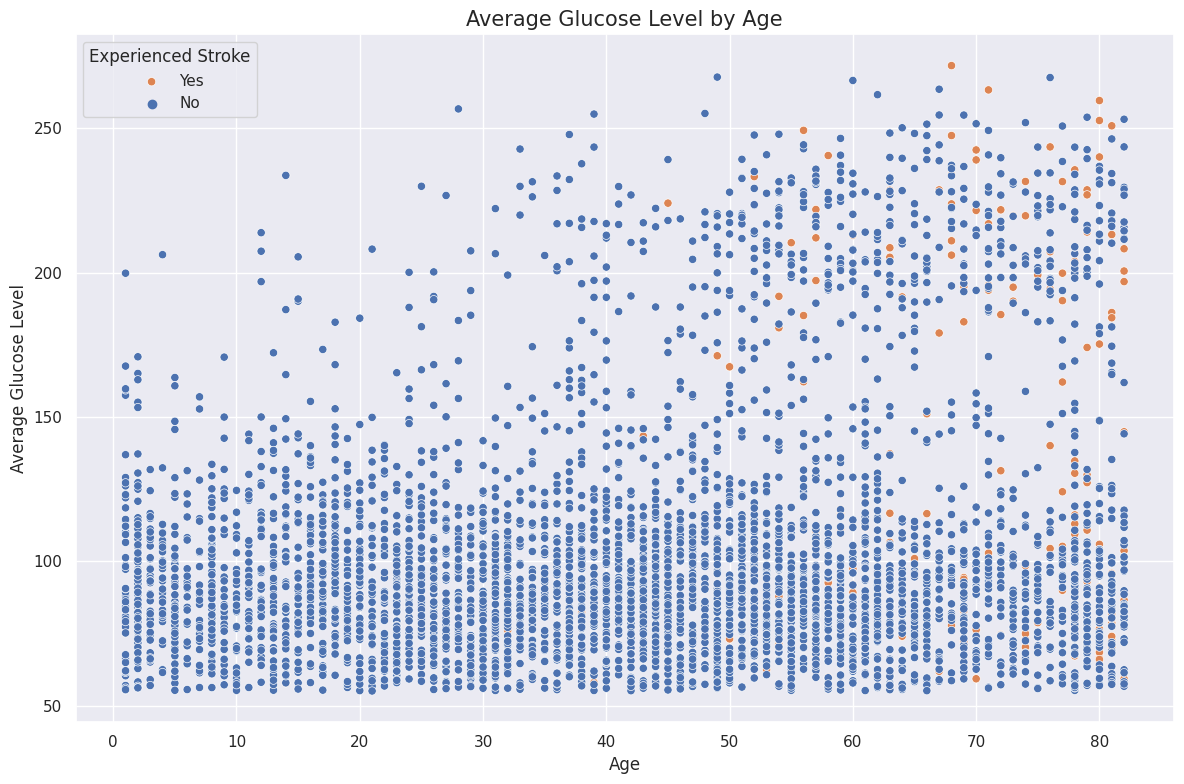

In [78]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue = 'stroke')
plt.legend(title='Experienced Stroke', loc='upper left', labels=['Yes', 'No'])
plt.title('Average Glucose Level by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.tight_layout();

- Looking at average glucose level, there is a set of outliers in the ranges of 40-85 (Age) and 175-300 (avg glucose level).
- From first glance, it seems most of our stroke victims are in the outlier group.

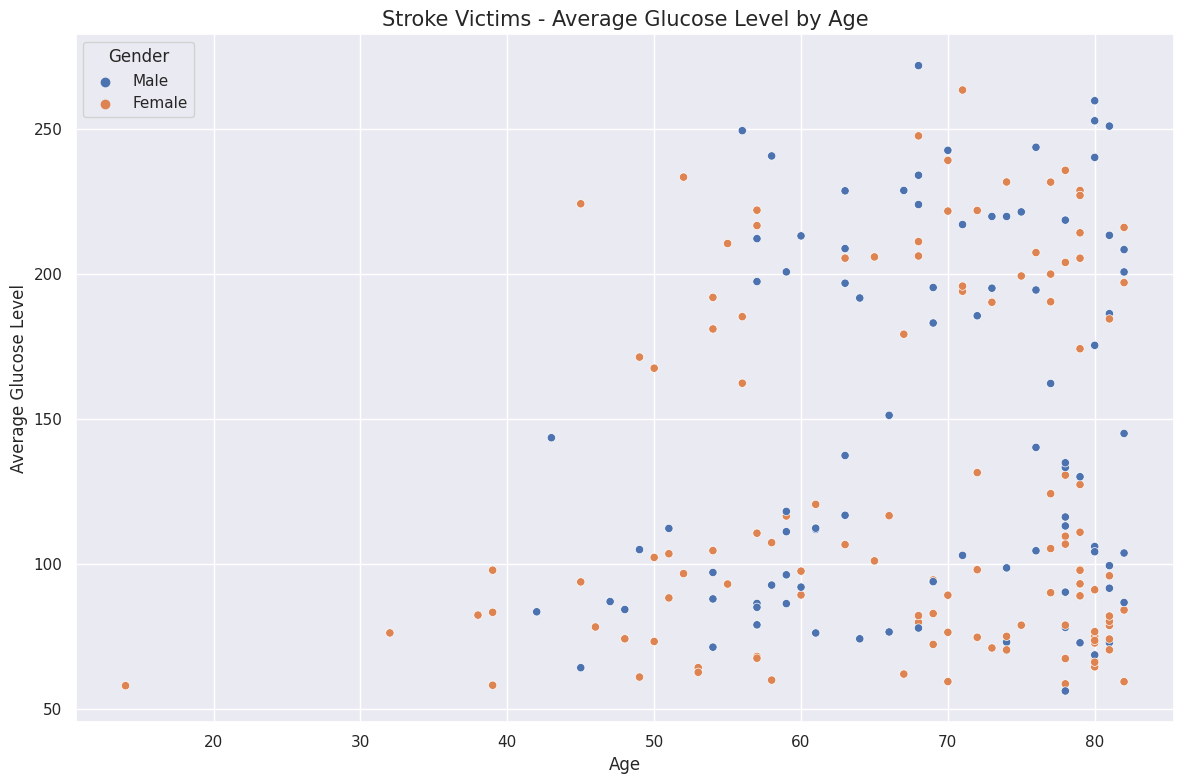

In [79]:
plt.figure(figsize = (12, 8))
c= sns.scatterplot(data = y_stroke,
                  x = 'age', y = 'avg_glucose_level',
                  hue = 'gender'
                  )
plt.legend(title='Gender', loc='upper left')
c.set_title('Stroke Victims - Average Glucose Level by Age', fontsize = 15)
c.set_xlabel('Age')
c.set_ylabel('Average Glucose Level')
plt.tight_layout();

- When we isolate our stroke victims and group by gender, we can see that they are evenly dispersed between the lower and upper glucose levels.
- Once again, we a pattern of rising occurences as age increases.

## I will use the two BMI graphs to share in my presentation.

#Modeling

##Preprocessing

In [80]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4867 non-null   object 
 1   age                4867 non-null   int64  
 2   hypertension       4867 non-null   int64  
 3   heart_disease      4867 non-null   int64  
 4   work_type          4867 non-null   object 
 5   residence_type     4867 non-null   object 
 6   avg_glucose_level  4867 non-null   float64
 7   bmi                4867 non-null   float64
 8   smoking_status     4867 non-null   object 
 9   stroke             4867 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 547.3+ KB


- I will convert object data into numerical data by one-hot encoding, since there is no obvious order or hierarchy of data.

In [82]:
# Train test split
X = df.drop(columns = 'stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
# Instantiating transofmers and tools
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')

In [84]:
# Instantiating Column Tranformer
nums = (scaler, num_select)
cats = (ohe, cat_select)
transformer = make_column_transformer(nums, cats)
preproc = make_pipeline(transformer, PCA(.95))

## Logistic Regression Model

In [85]:
# Resetting seaborn settings
sns.reset_orig()

###With PCA

In [86]:
# Since classes are heavily imbalanced, I will adjust class weight to compensate.

logreg = LogisticRegression(class_weight='balanced')
logreg_pipe = make_pipeline(preproc, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.99      0.71      0.82      1153
           1       0.14      0.84      0.24        64

    accuracy                           0.71      1217
   macro avg       0.56      0.77      0.53      1217
weighted avg       0.94      0.71      0.79      1217



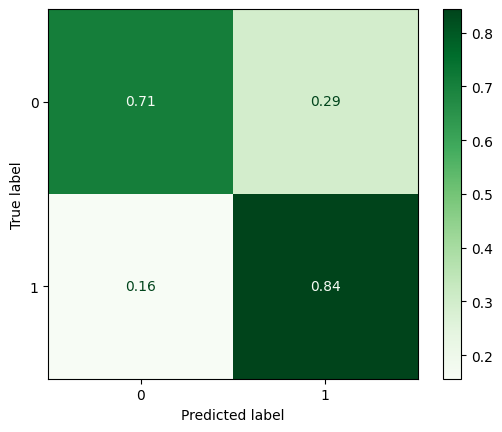

In [87]:
logreg_pred = logreg_pipe.predict(X_test)
print(classification_report(y_test, logreg_pred))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, normalize = 'true', cmap = 'Greens');

####Tuning the Model

In [88]:
# I will use GridSearchCV to find best parameters for tuning.

logreg_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                   ('pca', PCA(n_components=0.95))])),
  ('logisticregression', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[

In [89]:
lr_param_grid = {'logisticregression__max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_grid = GridSearchCV(logreg_pipe, lr_param_grid)
lr_grid.fit(X_train, y_train)
lr_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'logisticregression__C': 0.0001, 'logisticregression__max_iter': 10}

In [90]:
lr2_param_grid = {'logisticregression__max_iter': list(range(1,20)),
                 'logisticregression__C': [0.000001, 0.00001, 0.0001]}

lr2_grid = GridSearchCV(logreg_pipe, lr2_param_grid)
lr2_grid.fit(X_train, y_train)
lr2_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'logisticregression__C': 1e-05, 'logisticregression__max_iter': 8}

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1153
           1       0.17      0.75      0.27        64

    accuracy                           0.79      1217
   macro avg       0.57      0.77      0.57      1217
weighted avg       0.94      0.79      0.84      1217



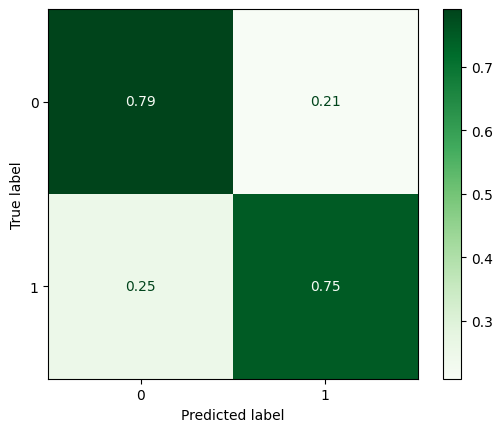

In [91]:
lr_tuned_pipe = make_pipeline(preproc, LogisticRegression(C=0.00001, max_iter=8, class_weight='balanced'))
lr_tuned_pipe.fit(X_train, y_train)
lr_tuned_pred = lr_tuned_pipe.predict(X_test)
print(classification_report(y_test, lr_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, lr_tuned_pred, normalize = 'true', cmap = 'Greens');

###Without PCA

In [92]:
logreg2 = LogisticRegression(class_weight='balanced')
logreg2_pipe = make_pipeline(transformer, logreg2)
logreg2_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

####Tuning the Model

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1153
           1       0.13      0.83      0.23        64

    accuracy                           0.70      1217
   macro avg       0.56      0.76      0.52      1217
weighted avg       0.94      0.70      0.79      1217



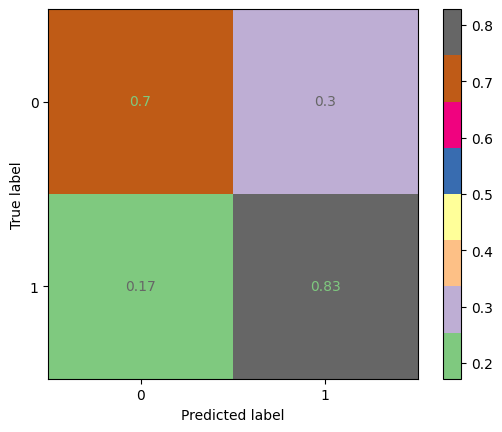

In [93]:
logreg2_pred = logreg2_pipe.predict(X_test)
print(classification_report(y_test, logreg2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, logreg2_pred, normalize = 'true', cmap = 'Accent');

In [94]:
lr3_param_grid = {'logisticregression__max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr3_grid = GridSearchCV(logreg2_pipe, lr3_param_grid)
lr3_grid.fit(X_train, y_train)
lr3_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'logisticregression__C': 0.0001, 'logisticregression__max_iter': 10}

In [95]:
logreg2_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
  ('logisticregression', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
     

In [96]:
lr4_param_grid = {'logisticregression__max_iter': list(range(1,20)),
                 'logisticregression__C': [0.000001, 0.00001, 0.0001]}

lr4_grid = GridSearchCV(logreg2_pipe, lr4_param_grid)
lr4_grid.fit(X_train, y_train)
lr4_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'logisticregression__C': 1e-05, 'logisticregression__max_iter': 8}

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1153
           1       0.17      0.75      0.27        64

    accuracy                           0.79      1217
   macro avg       0.57      0.77      0.57      1217
weighted avg       0.94      0.79      0.84      1217



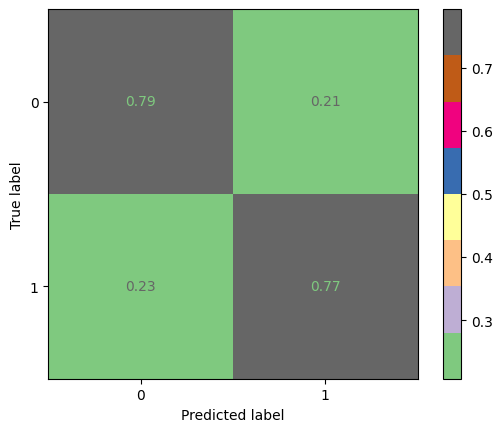

In [97]:
lr4_tuned_pipe = make_pipeline(transformer, LogisticRegression(C=0.00001, max_iter=8, class_weight='balanced'))
lr4_tuned_pipe.fit(X_train, y_train)
lr4_tuned_pred = lr4_tuned_pipe.predict(X_test)
print(classification_report(y_test, lr_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, lr4_tuned_pred, normalize = 'true', cmap = 'Accent');

## KNN Model

#### With PCA

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.17      0.02      0.03        64

    accuracy                           0.94      1217
   macro avg       0.56      0.51      0.50      1217
weighted avg       0.91      0.94      0.92      1217



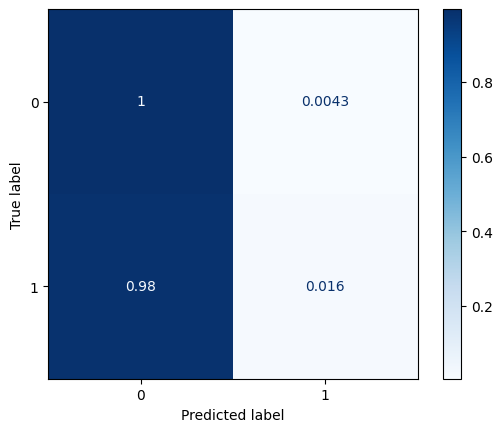

In [98]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preproc, knn)
knn_pipe.fit(X_train, y_train)
knn_pred = knn_pipe.predict(X_test)
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, normalize = 'true', cmap = 'Blues');

###Tuning the Model

In [99]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                   ('pca', PCA(n_components=0.95))])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',


In [100]:
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1,30)),
              'kneighborsclassifier__p': [1, 2, 3, 4]}

knngrid = GridSearchCV(knn_pipe, param_grid)
knngrid.fit(X_train, y_train)
knngrid.best_params_

{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1}

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.00      0.00      0.00        64

    accuracy                           0.95      1217
   macro avg       0.47      0.50      0.49      1217
weighted avg       0.90      0.95      0.92      1217



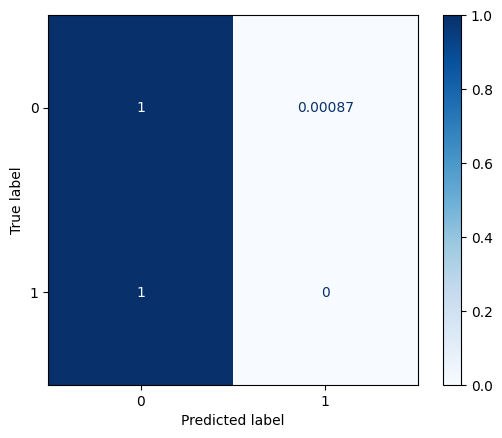

In [101]:
knn_tuned_pipe = make_pipeline(preproc, KNeighborsClassifier(n_neighbors=6, p=2, weights='uniform'))
knn_tuned_pipe.fit(X_train, y_train)
knn_tuned_pred = knn_tuned_pipe.predict(X_test)
print(classification_report(y_test, knn_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, knn_tuned_pred, normalize = 'true', cmap = 'Blues');

####Without PCA

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.20      0.02      0.03        64

    accuracy                           0.94      1217
   macro avg       0.57      0.51      0.50      1217
weighted avg       0.91      0.94      0.92      1217



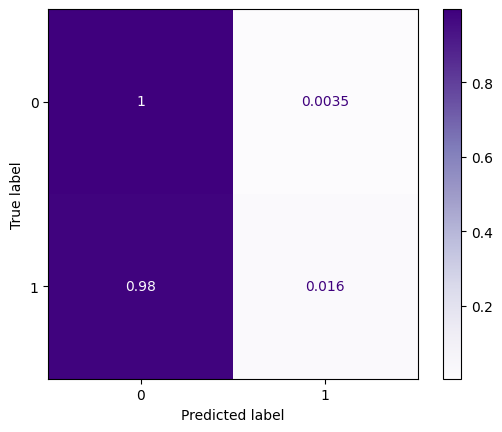

In [102]:
knn_pca = KNeighborsClassifier()
knn_pca_pipe = make_pipeline(transformer, knn_pca)
knn_pca_pipe.fit(X_train, y_train)
knn_pca_pred = knn_pca_pipe.predict(X_test)
print(classification_report(y_test, knn_pca_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pca_pred, normalize = 'true', cmap = 'Purples');

###Tuning the Model

In [103]:
knn_pca_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                        

In [104]:
knn_nopca_param_grid = {'kneighborsclassifier__n_neighbors': list(range(1,30)),
              'kneighborsclassifier__p': [1, 2, 3, 4]}

knnpcagrid = GridSearchCV(knn_pca_pipe, knn_nopca_param_grid)
knnpcagrid.fit(X_train, y_train)
knnpcagrid.best_params_

{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 1}

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.00      0.00      0.00        64

    accuracy                           0.95      1217
   macro avg       0.47      0.50      0.49      1217
weighted avg       0.90      0.95      0.92      1217



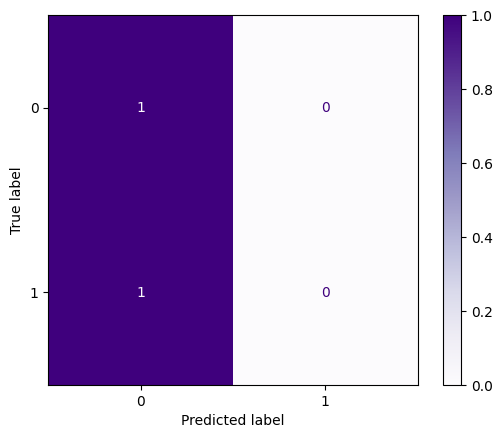

In [105]:
knn_tuned_pipe2 = make_pipeline(preproc, KNeighborsClassifier(n_neighbors=6, p=1))
knn_tuned_pipe2.fit(X_train, y_train)
knn_tuned_pred2 = knn_tuned_pipe2.predict(X_test)
print(classification_report(y_test, knn_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, knn_tuned_pred2, normalize = 'true', cmap = 'Purples');

## Balanced Random Forest Model

####With PCA

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel

              precision    recall  f1-score   support

           0       0.99      0.65      0.78      1153
           1       0.12      0.88      0.21        64

    accuracy                           0.66      1217
   macro avg       0.56      0.76      0.50      1217
weighted avg       0.94      0.66      0.75      1217



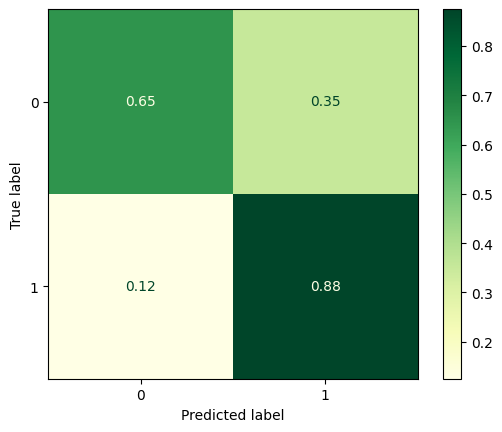

In [106]:
bal_clf = BalancedRandomForestClassifier()
bal_clf_pipe = make_pipeline(preproc, bal_clf)
bal_clf_pipe.fit(X_train, y_train)
bal_clf_pred = bal_clf_pipe.predict(X_test)
print(classification_report(y_test, bal_clf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, bal_clf_pred, normalize = 'true', cmap = 'YlGn');

###Tuning the Model

In [107]:
bal_clf_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                   ('pca', PCA(n_components=0.95))])),
  ('balancedrandomforestclassifier', BalancedRandomForestClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=

In [108]:
bal_clf_param_grid = {'balancedrandomforestclassifier__max_depth': [10, 25, 50, 75, 100, 150, 200],
                  'balancedrandomforestclassifier__n_estimators': [10, 25, 50, 75, 100, 150, 200]}

balclfgrid = GridSearchCV(bal_clf_pipe, bal_clf_param_grid)
balclfgrid.fit(X_train, y_train)
balclfgrid.best_params_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/pa

{'balancedrandomforestclassifier__max_depth': 25,
 'balancedrandomforestclassifier__n_estimators': 10}

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1153
           1       0.11      0.70      0.19        64

    accuracy                           0.69      1217
   macro avg       0.54      0.70      0.50      1217
weighted avg       0.93      0.69      0.78      1217



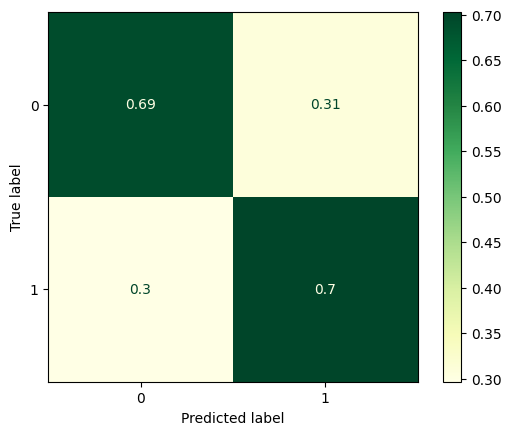

In [109]:
balclf_tuned_pipe = make_pipeline(preproc, BalancedRandomForestClassifier(max_depth=200, n_estimators=10))
balclf_tuned_pipe.fit(X_train, y_train)
balclf_tuned_pred = balclf_tuned_pipe.predict(X_test)
print(classification_report(y_test, balclf_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, balclf_tuned_pred, normalize = 'true', cmap = 'YlGn');

####Without PCA

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      1153
           1       0.12      0.94      0.21        64

    accuracy                           0.64      1217
   macro avg       0.56      0.78      0.49      1217
weighted avg       0.95      0.64      0.74      1217



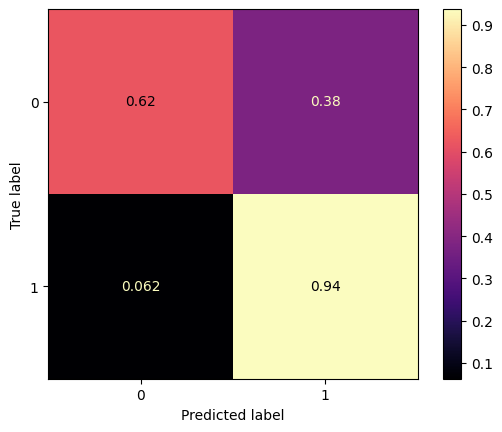

In [110]:
bal_clf2 = BalancedRandomForestClassifier()
bal_clf2_pipe = make_pipeline(transformer, bal_clf2)
bal_clf2_pipe.fit(X_train, y_train)
bal_clf2_pred = bal_clf2_pipe.predict(X_test)
print(classification_report(y_test, bal_clf2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, bal_clf2_pred, normalize = 'true', cmap = 'magma');

###Tuning the Model

In [111]:
bal_clf2_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
  ('balancedrandomforestclassifier', BalancedRandomForestClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
    

In [112]:
bal_clf2_param_grid = {'balancedrandomforestclassifier__max_depth': [10, 25, 50, 75, 100, 150, 200],
                  'balancedrandomforestclassifier__n_estimators': [10, 25, 50, 75, 100, 150, 200]}

bal_clf2grid = GridSearchCV(bal_clf2_pipe, bal_clf2_param_grid)
bal_clf2grid.fit(X_train, y_train)
bal_clf2grid.best_params_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/pa

{'balancedrandomforestclassifier__max_depth': 200,
 'balancedrandomforestclassifier__n_estimators': 10}

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1153
           1       0.12      0.75      0.21        64

    accuracy                           0.69      1217
   macro avg       0.55      0.72      0.51      1217
weighted avg       0.94      0.69      0.78      1217



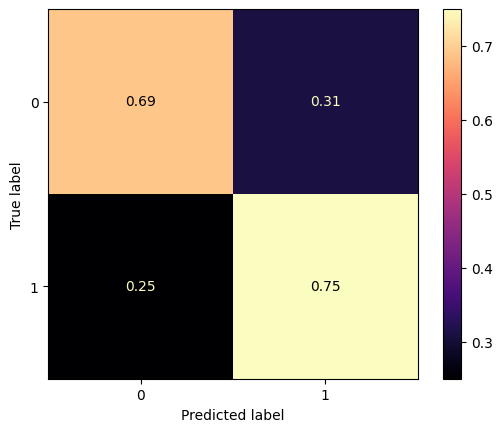

In [113]:
bal_clf2_tuned_pipe = make_pipeline(transformer, BalancedRandomForestClassifier(max_depth=200, n_estimators=10))
bal_clf2_tuned_pipe.fit(X_train, y_train)
bal_clf2_tuned_pred = bal_clf2_tuned_pipe.predict(X_test)
print(classification_report(y_test, bal_clf2_tuned_pred))

ConfusionMatrixDisplay.from_predictions(y_test, bal_clf2_tuned_pred, normalize = 'true', cmap = 'magma');

##Balanced Bagging Classifier Model

### With PCA

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1153
           1       0.13      0.61      0.22        64

    accuracy                           0.77      1217
   macro avg       0.55      0.69      0.54      1217
weighted avg       0.93      0.77      0.83      1217



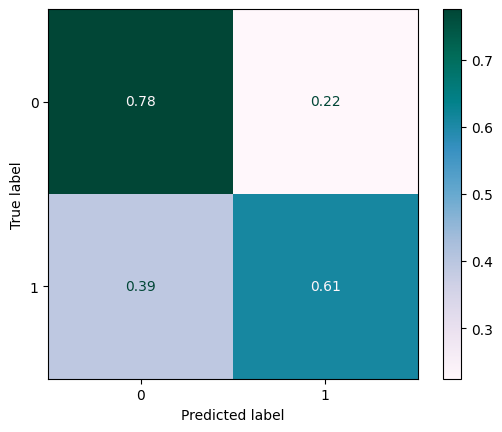

In [114]:
bbc = BalancedBaggingClassifier()
bbc_pipe = make_pipeline(preproc, bbc)
bbc_pipe.fit(X_train, y_train)
bbc_pred = bbc_pipe.predict(X_test)
print(classification_report(y_test, bbc_pred))
ConfusionMatrixDisplay.from_predictions(y_test, bbc_pred, normalize = 'true', cmap = 'PuBuGn');

####Tuning the Model

In [115]:
bbc_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                   ('pca', PCA(n_components=0.95))])),
  ('balancedbaggingclassifier', BalancedBaggingClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standar

In [116]:
bbc_param_grid = {'balancedbaggingclassifier__n_estimators': list(range(1,20))}

bbcgrid = GridSearchCV(bbc_pipe, bbc_param_grid)
bbcgrid.fit(X_train, y_train)
bbcgrid.best_params_

{'balancedbaggingclassifier__n_estimators': 2}

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1153
           1       0.15      0.56      0.23        64

    accuracy                           0.80      1217
   macro avg       0.56      0.69      0.56      1217
weighted avg       0.93      0.80      0.85      1217



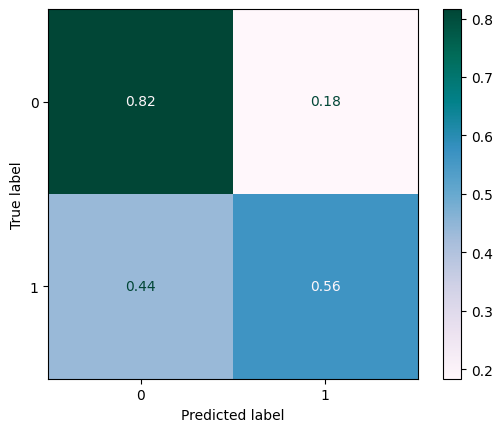

In [117]:
bbc2_pipe = make_pipeline(preproc, BalancedBaggingClassifier(n_estimators=2))
bbc2_pipe.fit(X_train, y_train)
bbc2_pred = bbc2_pipe.predict(X_test)
print(classification_report(y_test, bbc2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, bbc2_pred, normalize = 'true', cmap = 'PuBuGn');

###Without PCA

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1153
           1       0.16      0.70      0.25        64

    accuracy                           0.78      1217
   macro avg       0.57      0.75      0.56      1217
weighted avg       0.94      0.78      0.84      1217



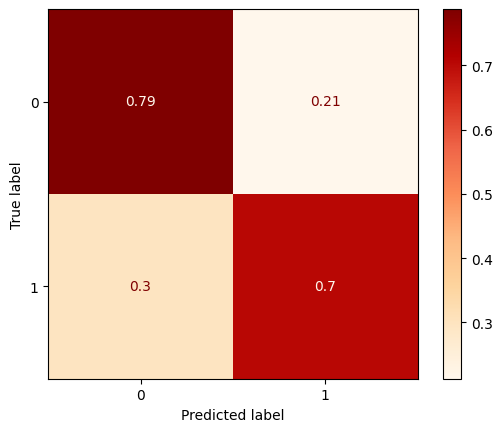

In [118]:
no_bbc = BalancedBaggingClassifier()
no_bbc_pipe = make_pipeline(transformer, no_bbc)
no_bbc_pipe.fit(X_train, y_train)
no_bbc_pred = no_bbc_pipe.predict(X_test)
print(classification_report(y_test, no_bbc_pred))
ConfusionMatrixDisplay.from_predictions(y_test, no_bbc_pred, normalize = 'true', cmap = 'OrRd');

#### Tuning the Model

In [119]:

no_bbc_param_grid = {'balancedbaggingclassifier__n_estimators': list(range(1,20))}

no_bbcgrid = GridSearchCV(no_bbc_pipe, no_bbc_param_grid)
no_bbcgrid.fit(X_train, y_train)
no_bbcgrid.best_params_

{'balancedbaggingclassifier__n_estimators': 2}

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1153
           1       0.15      0.56      0.23        64

    accuracy                           0.80      1217
   macro avg       0.56      0.69      0.56      1217
weighted avg       0.93      0.80      0.85      1217



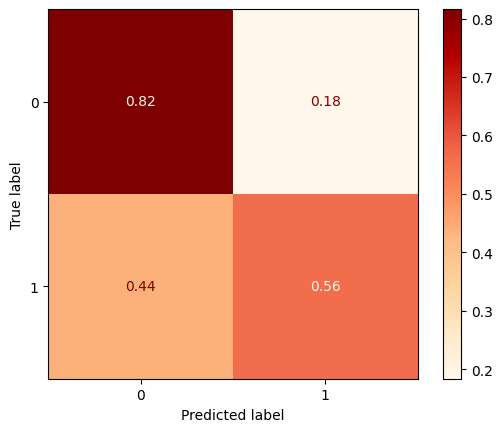

In [120]:
no_bbc2_pipe = make_pipeline(transformer, BalancedBaggingClassifier(n_estimators=2))
no_bbc2_pipe.fit(X_train, y_train)
no_bbc2_pred = bbc2_pipe.predict(X_test)
print(classification_report(y_test, no_bbc2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, no_bbc2_pred, normalize = 'true', cmap = 'OrRd');

##XGB Classifier

In [127]:
from xgboost import XGBClassifier

###Without PCA

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.17      0.02      0.03        64

    accuracy                           0.94      1217
   macro avg       0.56      0.51      0.50      1217
weighted avg       0.91      0.94      0.92      1217



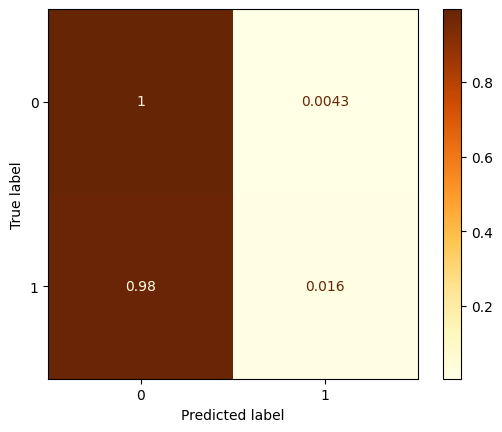

In [139]:
xgb = XGBClassifier()
xgb_pipe = make_pipeline(transformer, xgb)
xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_test)
print(classification_report(y_test, xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, normalize = 'true', cmap = 'YlOrBr');

####Tuning the Model

In [131]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060db50>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7f75e060dd00>)])),
                   ('pca', PCA(n_components=0.95))])),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, earl

In [132]:
xgb_param_grid = {'xgbclassifier__max_depth': list(range(1,20)),
                  'xgbclassifier__sampling_method': ['uniform', 'gradient_based']}

xgbgrid = GridSearchCV(xgb_pipe, xgb_param_grid)
xgbgrid.fit(X_train, y_train)
xgbgrid.best_params_

{'xgbclassifier__max_depth': 1, 'xgbclassifier__sampling_method': 'uniform'}

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1153
           1       0.00      0.00      0.00        64

    accuracy                           0.95      1217
   macro avg       0.47      0.50      0.49      1217
weighted avg       0.90      0.95      0.92      1217



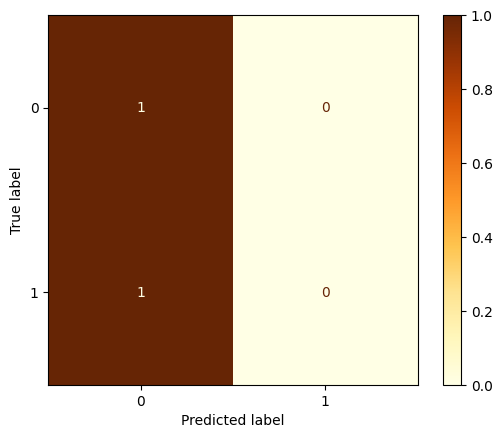

In [140]:
xgb2_pipe = make_pipeline(transformer, XGBClassifier(max_depth='1', sampling_method='uniform'))
xgb2_pipe.fit(X_train, y_train)
xgb2_pred = xgb2_pipe.predict(X_test)
print(classification_report(y_test, xgb2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb2_pred, normalize = 'true', cmap = 'YlOrBr');

#Final Model

              precision    recall  f1-score   support

           0       0.99      0.71      0.82      1153
           1       0.14      0.84      0.24        64

    accuracy                           0.71      1217
   macro avg       0.56      0.77      0.53      1217
weighted avg       0.94      0.71      0.79      1217



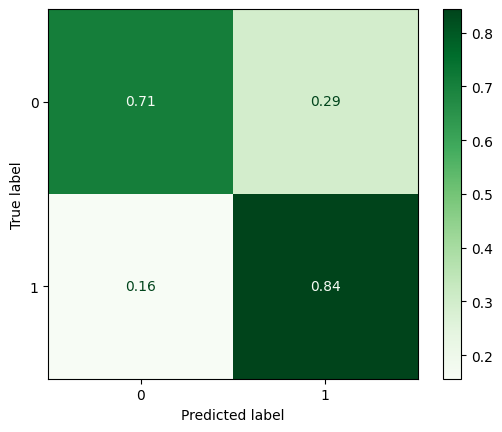

In [122]:
# With PCA
print(classification_report(y_test, logreg_pred))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, normalize = 'true', cmap = 'Greens');

- I will use the Logistic Regression Model with PCA as my production model.
- Though only 71% accurate (as compared to the 79% accuracy with the tuned Logistic Regression Model with PCA), I have chosen this model for its higher recall score.
- While predicting a stroke, while important to accurately predict the possibility of a stroke, it is also very important to lower the chances of any false negatives. A false negative in this case is not predicting a stroke, but having one.
- Though the Balanced Random Forest Classifier Model without PCA has the lowest number of false positives, it also has a lower accuracy and less true positives.
> In this case, a true positive is predicting a stroke correctly, which is our target. Though we have less false negatives, we also have less correct predictions of stroke.